In [1]:
import numpy as np
import pandas as pd

In [59]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

In [3]:
df = pd.read_csv('./stud_data.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
X = df.drop(columns='math_score',axis=1)
y = df['math_score']

In [16]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oh_encoder = OneHotEncoder()
num_encoder = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_encoder,cat_features),
        ('StandardScaler',num_encoder,num_features),
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=.2)

In [21]:
def model_eval(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    r2_error = r2_score(true,pred)
    
    return mae,mse,rmse,r2_error


In [60]:
models = {
    'linear regression': LinearRegression(),
    'lasso': Lasso(),
    'ridge': Ridge(),
    'KNN' : KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SV' : SVR(),
    'Random Forest': RandomForestRegressor(),
    'ADA boost' : AdaBoostRegressor(),
    'cat boste': CatBoostRegressor(),
}
model_list = []
r2_list = {}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae,train_mse,train_rmse,train_r2 = model_eval(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2 = model_eval(y_test,y_test_pred)
    
    print('Model performance for Training set')
    print (" - Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("_ Mean Absolute Error:",train_mae)
    print("_ R2 Score:", train_r2)
    
    print('-------------------------------------------')
    print ('Model performance for Test set')
    print(" _ Root Mean Squared Error: {:.4f}".format(test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(test_mae))
    print (" _ R2 Score: {:.4f}".format(test_r2))
    r2_list[model] = test_r2

Model performance for Training set
 - Root Mean Squared Error: 5.3534
_ Mean Absolute Error: 4.26732421875
_ R2 Score: 0.8527343674255853
-------------------------------------------
Model performance for Test set
 _ Root Mean Squared Error: 5.3128
 - Mean Absolute Error: 4.1666
 _ R2 Score: 0.8601
Model performance for Training set
 - Root Mean Squared Error: 6.5972
_ Mean Absolute Error: 5.181066474394727
_ R2 Score: 0.6948744482272411
-------------------------------------------
Model performance for Test set
 _ Root Mean Squared Error: 6.1312
 - Mean Absolute Error: 4.9571
 _ R2 Score: 0.7470
Model performance for Training set
 - Root Mean Squared Error: 5.3252
_ Mean Absolute Error: 4.253202010957603
_ R2 Score: 0.857950841933024
-------------------------------------------
Model performance for Test set
 _ Root Mean Squared Error: 5.3284
 - Mean Absolute Error: 4.1930
 _ R2 Score: 0.8643
Model performance for Training set
 - Root Mean Squared Error: 5.8907
_ Mean Absolute Error: 4.6

TypeError: unhashable type: 'CatBoostRegressor'

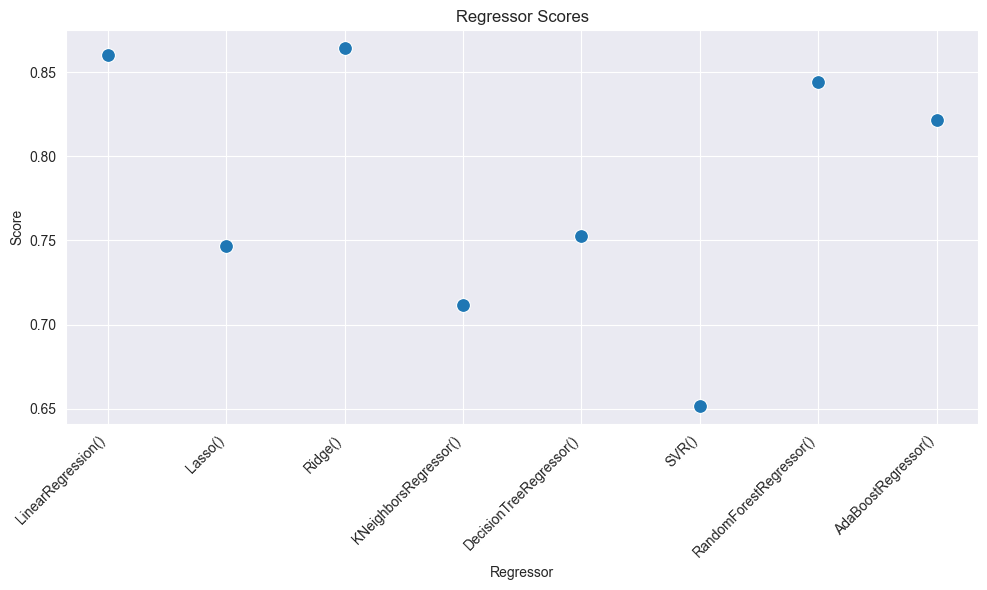

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
regressors = list(r2_list.keys())
scores_values = list(r2_list.values())

# Assign numerical values to regressors
regressor_indices = np.arange(len(regressors))

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=regressor_indices, y=scores_values, marker='o', s=100)
plt.title('Regressor Scores')
plt.xlabel('Regressor')
plt.ylabel('Score')
plt.xticks(ticks=regressor_indices, labels=regressors, rotation=45, ha='right')
plt.tight_layout()
plt.show()
